# SHAP Values

**SHAP (SHapley Additive exPlanations) Values** is a popular method for explaining the output of supervised machine learning models. SHAP values are based on cooperative game theory and provide insights into how features contribute to the predictions made by a model. SHAP values provide a way to interpret the output of the model by computing the contribution of each feature to the prediction. SHAP values are particularly useful in environments where model transparency is crucial, such as in finance, healthcare, and regulatory scenarios.

By breaking down predictions into feature contributions, SHAP helps to understand how models make decisions and what features are most important. 

SHAP values are useful to:

- **Understand Individual Predictions**: SHAP values for help explain how each feature contributed to the model’s prediction. They help to interpret the outputs of complex machine learning models by assigning each feature an importance value for each prediction.
  
- **Visualize Explanation for Specific Instances**: This can be particularly useful when you want to visualize or analyze the model’s behavior on specific data points, for example, to understand why the model made a particular decision. **Summary plots**, **dependence plots**, and **force plots** are powerful visual tools provided by SHAP to understand model behavior.

The [SHAP](https://shap.readthedocs.io/en/latest/) library provides various plots to understand model predictions, which can be invaluable for debugging and model transparency. These techniques are applicable to many machine learning models, such as Random Forests, gradient boosting machines, deep neural networks, and linear models.

# Demo: Adult Income Dataset

This section shows how to use SHAP on the Adult Income dataset to visualize feature importance and interpret individual predictions. 

In the  Adult Income dataset, we want to build a ML model for the following binary classification task: 

> We want a model to predict whether an individual earns more or less than $50,000 per year based on several features (like age, education, occupation, etc.)

The original data includes the following columns (description taken from [here](https://shap.readthedocs.io/en/latest/generated/shap.datasets.adult.html)):
- Age (float) : Age in years.
- Workclass (category) : Type of employment.
- fnlwgt (float) : Final weight; the number of units in the target population that the record represents.
- Education (category) : Highest level of education achieved.
- Education-Num (float) : Numeric representation of education level.
- Marital Status (category) : Marital status of the individual.
- Occupation (category) : Type of occupation.
- Relationship (category) : Relationship status.
- Race (category) : Ethnicity of the individual.
- Sex (category) : Gender of the individual.
- Capital Gain (float) : Capital gains recorded.
- Capital Loss (float) : Capital losses recorded.
- Hours per week (float) : Number of hours worked per week.
- Country (category) : Country of origin.
- Target (category) : Binary target variable indicating whether the individual earns more than 50K.

The following is an illustrative example of the use of SHAP Values in this dataset:

- Suppose that, after training your model, you want to understand why the model predicted certain individuals in the test set to earn more than $50,000.

- You select a subset of instances from your test set to perform a detailed analysis. 

- You then compute the SHAP values for these instances, allowing you to see the contribution of each feature (such as age or education level) to the model's prediction for each instance. 

- The computed SHAP values can then be visualized using various SHAP plots (like summary plots or force plots), which help in interpreting and explaining the model's predictions for these specific cases.

## Installing Required Libraries

To get started, you'll need to install the required libraries. If you haven't already installed `shap` and `scikit-learn`, you can do so by running the following commands:

In [233]:
# pip install shap scikit-learn pandas

## Loading the Adult Income Dataset

First, we need to load the Adult Income dataset. This dataset comes with the SHAP library, so we will use this libray to get access to it.


In [ ]:
import shap
raw_data, target = shap.datasets.adult(display=True)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [235]:
raw_data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [237]:
raw_data.relationship.unique()

array(['Not-in-family', 'Husband', 'Wife', 'Own-child', 'Unmarried',
       'Other-relative'], dtype=object)

In [238]:
df.workclass.unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', nan, 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [239]:
df.race.unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
       'Other'], dtype=object)

In [240]:
df['native_country'].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', nan, 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

<Axes: >

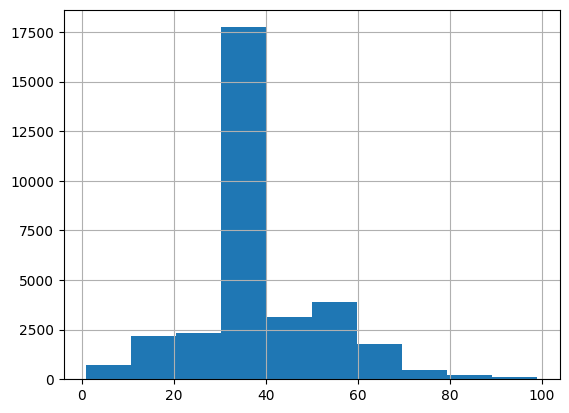

In [241]:
df['hours_per_week'].hist()

## Splitting the Data

Before we use the dataset for modeling, we'll need to preprocess it. This involves handling missing values, encoding categorical variables, and splitting the data into features and labels.

In [243]:
raw_data

,Age,Workclass,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
0,39.0,State-gov,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States
1,50.0,Self-emp-not-inc,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States
2,38.0,Private,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States
3,53.0,Private,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States
4,28.0,Private,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27.0,Private,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,0.0,38.0,United-States
32557,40.0,Private,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States
32558,58.0,Private,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0.0,40.0,United-States
32559,22.0,Private,9.0,Never-married,Adm-clerical,Own-child,White,Male,0.0,0.0,20.0,United-States


In [244]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X, y = shap.datasets.adult()

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [245]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             32561 non-null  float32
 1   Workclass       32561 non-null  int8   
 2   Education-Num   32561 non-null  float32
 3   Marital Status  32561 non-null  int8   
 4   Occupation      32561 non-null  int8   
 5   Relationship    32561 non-null  int64  
 6   Race            32561 non-null  int8   
 7   Sex             32561 non-null  int8   
 8   Capital Gain    32561 non-null  float32
 9   Capital Loss    32561 non-null  float32
 10  Hours per week  32561 non-null  float32
 11  Country         32561 non-null  int8   
dtypes: float32(5), int64(1), int8(6)
memory usage: 1.1 MB


Notice the ‘Target’ column is converted to binary (True/False) where ‘>50K’ is True and ‘<=50K’ is False.

In [246]:
y[y==0].shape,y[y==1].shape

((24720,), (7841,))

## Training the Machine Learning Model

We'll use a XGBoost classifier for this binary classification task.

In [247]:
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Initialize the model
model = xgb.XGBClassifier(eval_metric="mlogloss", use_label_encoder=False)

# Train the model
model.fit(X_train, y_train)

# Check model performance
print(f"Model Accuracy: {model.score(X_test, y_test):.2f}")

Model Accuracy: 0.88


## Using SHAP to Explain Model Predictions

Now, we will use SHAP to explain the predictions made by our Random Forest model.


In [248]:
%%time

# !pip install ipywidgets
# !jupyter nbextension enable --py widgetsnbextension

# see: https://stackoverflow.com/questions/67998191/importerror-iprogress-not-found-please-update-jupyter-and-ipywidgets-although
from ipywidgets import FloatProgress

import shap

num_samples = 2000

# Initialize the SHAP explainer
explainer = shap.TreeExplainer(model)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test[0:num_samples])

[10:28:34] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


CPU times: user 1.19 s, sys: 0 ns, total: 1.19 s
Wall time: 281 ms


### Summary Plot

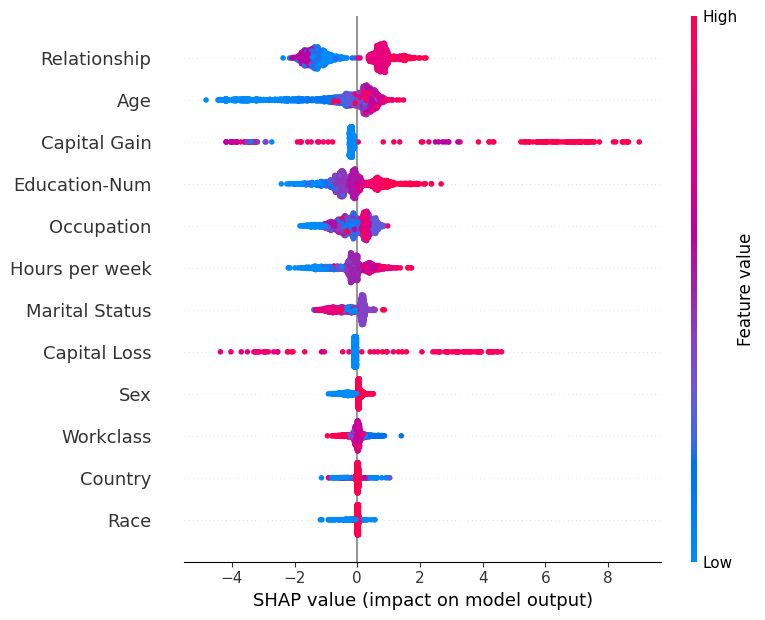

In [249]:
# Summary plot
shap.summary_plot(shap_values, X_test[0:num_samples])

The instruction `explainer = shap.TreeExplainer(model)` is a first step in the process of using the SHAP (SHapley Additive exPlanations) library to interpret machine learning models, specifically tree-based models like decision trees, random forests, gradient boosting machines (e.g., RandomForestClassifier, XGBoost, LightGBM, CatBoost), and others.

1. `shap.TreeExplainer`
- This is a classe provided by the SHAP library specifically designed to explain the outputs of tree-based machine learning models. It leverages optimized algorithms that are tailored for tree structures to compute SHAP values efficiently.

- SHAP values are based on the concept of Shapley values from cooperative game theory. They provide a way to fairly distribute the "payout" (in this case, the prediction made by the model) among the "players" (the features) based on their contribution to the prediction.

2. `model`
 - The model argument passed to TreeExplainer is the machine learning model you want to interpret. In the context of the provided code, model is an instance of RandomForestClassifier, a type of tree-based model.

 - By passing the model to shap.TreeExplainer, you are telling SHAP which model's predictions you want to explain.

3. What shap.TreeExplainer Does
- Initialization: When you create an instance of TreeExplainer, it initializes the explainer for the provided tree-based model. This involves understanding the structure of the model and preparing to calculate SHAP values for its predictions.

- Model-Specific Optimization: TreeExplainer uses an efficient algorithm tailored to the tree structure of the model, which allows it to compute SHAP values much faster than a general-purpose method would. This is particularly important for models with many trees or large datasets.

- Compatibility: TreeExplainer works with various tree-based models, including RandomForestClassifier, RandomForestRegressor, XGBClassifier, XGBRegressor, LGBMClassifier, LGBMRegressor, CatBoostClassifier, and CatBoostRegressor, among others. This makes it versatile and widely applicable.

The instruction `shap_values = explainer.shap_values(X_test[0:num_samples])` in the provided code is used to compute the SHAP values for a subset of instances from the test dataset, `X_test`. This helps in understanding the contribution of each feature to the model’s predictions for those specific instances, providing insights into the model’s decision-making process. Let’s break down what each part of this instruction does:

   - **`explainer`**: This is an instance of the SHAP `TreeExplainer` class that has been initialized with the trained machine learning model (in this case, a Random Forest classifier). The explainer is responsible for calculating SHAP values, which quantify the contribution of each feature to the prediction made by the model.
   
   - **`shap_values`**: The method `shap_values()` is called on the `explainer` object. This method computes the SHAP values for the provided data. SHAP values are calculated for each feature of each instance in the dataset provided as input to this method.
   
   - **`X_test[0:num_samples]`**: This is a slice of the test dataset `X_test`. Here, `X_test[0:num_samples]` selects the rows from index 1 to `num_samples` (inclusive of 0 and exclusive of `num_samples`) from `X_test`. This subset contains `num_samples` instances of the test data. The slicing operation essentially selects these `num_samples` instances for which the SHAP values will be calculated. 



The instruction `shap.summary_plot(shap_values[1], X_test[0:num_samples])` is used to create a summary plot using the SHAP (SHapley Additive exPlanations) library, which visualizes the SHAP values for a specific subset of the dataset. Let's break down this instruction to understand what it does:

1. **`shap.summary_plot()`**: This is a function from the SHAP library that generates a summary plot. The summary plot provides a high-level overview of the feature importance and the distribution of feature impacts on the model's output.

2. **`shap_values[1]`**:
   - `shap_values` is a list of SHAP values generated by the SHAP explainer. For a binary classification task, `shap_values` typically contains two arrays:
     - `shap_values[0]`: Corresponds to the SHAP values for class 0 (usually indicating the prediction is less than 50% probability for the positive class).
     - `shap_values[1]`: Corresponds to the SHAP values for class 1 (usually indicating the prediction is greater than 50% probability for the positive class).
   - We use `shap_values[1]` because we are interested in explaining the predictions for class 1, which is typically the "positive" (minoritary) class in a binary classification task.

- **Feature Importance**: The plot ranks features based on their importance across the provided data subset. Features higher on the plot are more influential in the model’s predictions for the positive class.
- **Impact of Feature Values**: The summary plot displays how individual feature values impact the model’s output. Each dot represents a SHAP value for a feature and an instance in the dataset. The color of the dot represents the value of the feature (e.g., red for higher values and blue for lower values). 
- **Feature Impact Distribution**: The distribution of dots across the x-axis shows the range of impact each feature has on the model output, indicating whether the feature generally increases or decreases the prediction for the positive class.

This summary plot helps visualize which features most significantly contribute to the predictions for the positive class for the specific subset of data and how these features influence the predictions.

### Dependence Plot

A Dependence Plot shows the relationship between the feature value and the SHAP value, indicating how changes in the feature impact the model prediction.


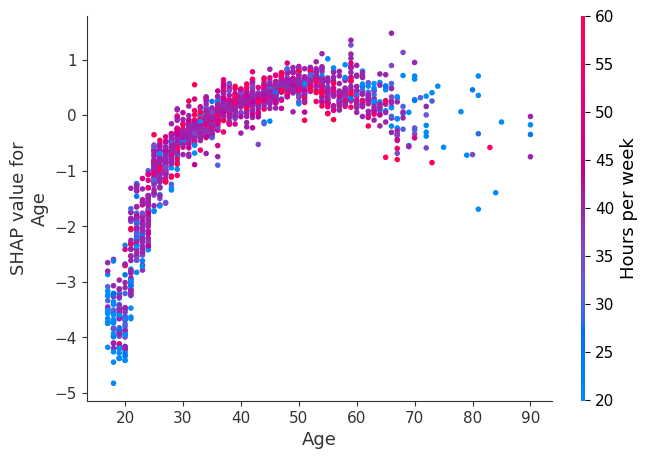

In [250]:
# Dependence plot for a specific feature
shap.dependence_plot("Age", shap_values, X_test[0:num_samples], interaction_index='Hours per week')

### Force Plot

The force plot is useful for visualizing how different features contribute to a single prediction. It shows the pushing and pulling effect of each feature on the model's prediction.

In [253]:
# Force plot for the instance with index 10 in the test set
shap.initjs()
sample_idx = 10
shap.force_plot(explainer.expected_value, shap_values[sample_idx], X_test.iloc[sample_idx])

The **force plot** created by this instruction visually breaks down the model's prediction for the first instance in `X_test` (for class `1`) by showing how each feature contributed to pushing the prediction higher or lower compared to the baseline (`expected_value`). It helps interpret why the model made the prediction it did, based on the contributions of individual features. The force plot is particularly useful in understanding model predictions for specific instances, providing a detailed explanation of the underlying factors that influenced the decision.

The instruction `shap.force_plot(explainer.expected_value[1], shap_values[1][0], X_test.iloc[0])` is used to create a **force plot** in SHAP, which visually explains how different features contribute to a single prediction made by a machine learning model. Let's break down each component of this instruction to understand its purpose and functionality:

1. **`explainer.expected_value[1]`**:
   - **What it is**: This represents the **baseline** or **expected value** of the model's output for the class being explained. In the context of SHAP values, this is the average model output over the training dataset for the target class. For binary classification problems, SHAP typically provides an `expected_value` for each class (e.g., `0` and `1`).
   - **In this case**: `explainer.expected_value[1]` refers to the baseline prediction for class `1` (e.g., predicting income >50K in the Adult Income dataset).

2. **`shap_values[1][0]`**:
   - **What it is**: This is the array of SHAP values for the features of the first instance in the test set (`X_test`). SHAP values quantify the contribution of each feature to the difference between the actual model output for the instance and the baseline output (`expected_value`).
   - **In this case**: `shap_values[1][0]` represents the SHAP values for class `1` for the first row of `X_test`. It shows how much each feature contributes to the prediction for class `1` for this specific instance.

3. **`X_test.iloc[0]`**:
   - **What it is**: This selects the first instance (row) of the test dataset `X_test`. The `iloc` method in pandas is used for index-based selection of rows and columns.
   - **In this case**: `X_test.iloc[0]` refers to the feature values of the first instance in the test set. These feature values are used to label the plot with the actual values that each feature takes for this instance.

The `shap.force_plot()` function generates a force plot, which is a visual representation of how individual features contribute to a specific prediction. 

- **Positive Contribution**: Features that increase the model's prediction (push the prediction towards a higher value, class 1 in this case) are shown in one color (usually red), and the length of the bar represents the magnitude of their contribution.
  
- **Negative Contribution**: Features that decrease the model's prediction (push it towards a lower value, class 0 in this case) are shown in another color (usually blue), with the length of the bar also representing the magnitude of their impact.

# Demo: California Housing Dataset

In this section, we demonstrate how to use SHAP with the California housing dataset to interpret a Random Forest model.

Predictive attributes in this dataset ([source](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset)):
- **MedInc** median income in block group
- **HouseAge** median house age in block group
- **AveRooms** average number of rooms per household
- **AveBedrms** average number of bedrooms per household
- **Population** block group population
- **AveOccup** average number of household members
- **Latitude** block group latitude
- **Longitude** block group longitude

The target variable is the median house value for California districts, expressed in hundreds of thousands of dollars ($100,000).

In [222]:
import shap
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Load the California housing dataset
california = fetch_california_housing(as_frame=True)
X = california.data
y = california.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [223]:
# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [227]:
%%time

# Create a SHAP explainer
explainer = shap.TreeExplainer(model)

# Generating SHAP values can be
num_samples = 200

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test[0:num_samples])

CPU times: user 48.7 s, sys: 236 ms, total: 48.9 s
Wall time: 48.8 s


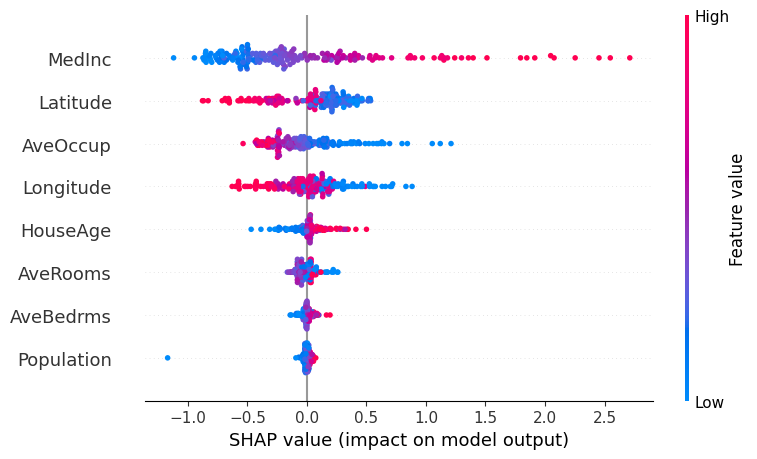

In [228]:
# Summary plot
shap.summary_plot(shap_values, X_test[0:num_samples])

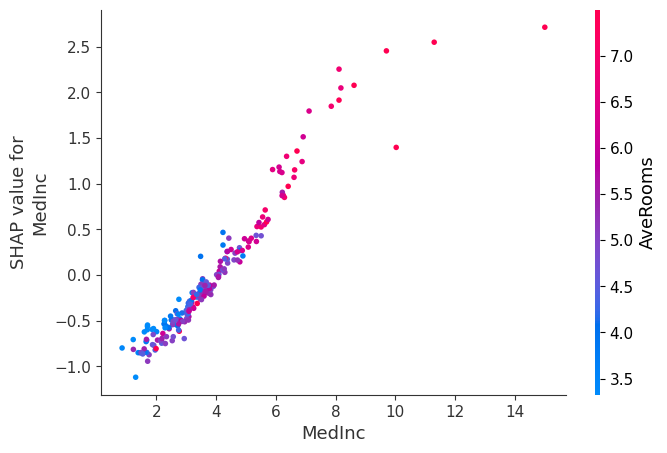

In [229]:
# Dependence plot for the feature 'MedInc' (Median Income)
shap.dependence_plot('MedInc', shap_values, X_test[0:num_samples])

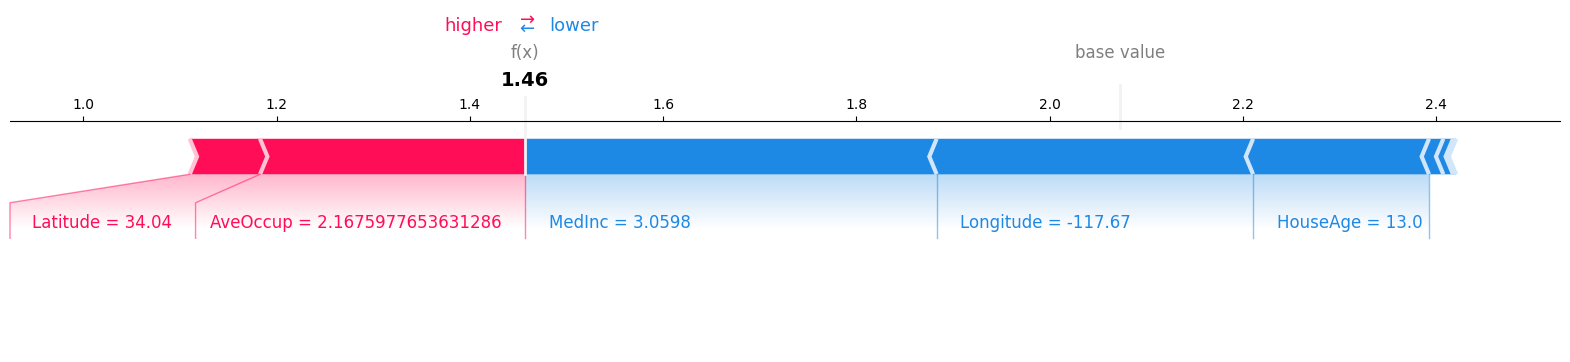

In [230]:
# Force plot for the instance with index 100 in the test set
sample_idx = 100
shap.force_plot(explainer.expected_value, shap_values[sample_idx], X_test.iloc[sample_idx], matplotlib=True)

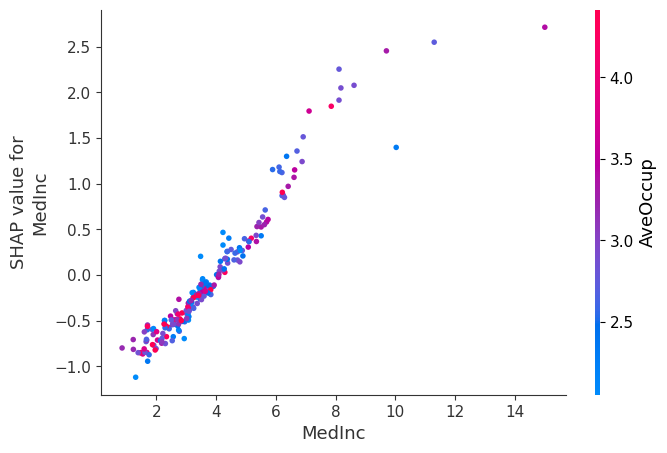

In [231]:
# Interaction plot between 'MedInc' and 'AveOccup' (Average Occupancy)
shap.dependence_plot('MedInc', shap_values, X_test[0:num_samples], interaction_index='AveOccup')

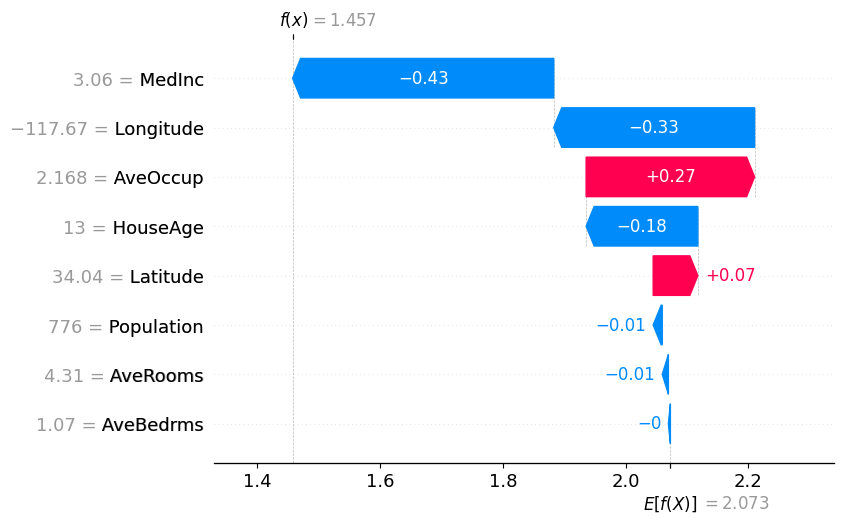

In [232]:
# Waterfall plot for instance with index 100 in the test set
sample_idx = 100
shap.waterfall_plot(shap.Explanation(values=shap_values[sample_idx], 
                                     base_values=explainer.expected_value, 
                                     data=X_test.iloc[sample_idx]))

# References

1. [SHAP (SHapley Additive exPlanations)](https://christophm.github.io/interpretable-ml-book/shap.html)
2. [How to Use SHAP Values to Optimize and Debug ML Models](neptune.ai/blog/shap-values)
3. [An introduction to explainable AI with Shapley values](https://shap.readthedocs.io/en/latest/example_notebooks/overviews/An%20introduction%20to%20explainable%20AI%20with%20Shapley%20values.html)
4. [Applied Machine Learning Explainability Techniques](https://github.com/PacktPublishing/Applied-Machine-Learning-Explainability-Techniques)